In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy import stats


In [2]:
ruter_data=pd.read_csv("Ruter_data.csv", sep=";")
ruter_data.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [3]:
# Printer ut liste med alle avgangene til buss nr 260.

df=pd.read_csv("Ruter_data.csv",sep=";")
df[df.Linjenavn=="260"]

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
27,25003-2020-07-22T09:20:00+02:00,22/07/2020,Viken,Vest,Asker,Bleikerhaugen,Askerhallen,Lokal,Viken,260,1,09:24:36,09:24:41,09:24:00,09:24:00,112,0
28,26115-2020-07-27T20:42:00+02:00,27/07/2020,Viken,Vest,Asker,Dambo,Prestenga,Lokal,Viken,260,0,21:04:02,21:04:09,21:04:00,21:04:00,112,2
36,25026-2020-08-03T14:35:00+02:00,03/08/2020,Viken,Vest,Asker,Skjæret,Sjøvollveien,Lokal,Viken,260,0,15:16:02,15:16:10,15:15:00,15:15:00,112,2
1917,25025-2020-08-20T14:35:00+02:00,20/08/2020,Viken,Vest,Asker,Skjæret,Sjøvollveien,Lokal,Viken,260,0,15:15:11,15:15:17,15:15:00,15:15:00,112,4
1920,25006-2020-08-29T14:35:00+02:00,29/08/2020,Viken,Vest,Asker,Kornmagasinet,Ølstadveien vest,Lokal,Viken,260,0,14:57:07,14:57:09,14:56:00,14:56:00,112,1
2040,25022-2020-08-21T14:20:00+02:00,21/08/2020,Viken,Vest,Asker,Ølstadveien vest,Kornmagasinet,Lokal,Viken,260,1,15:13:09,15:13:12,14:50:00,14:50:00,112,-2
2335,25003-2020-08-07T09:20:00+02:00,07/08/2020,Viken,Vest,Asker,Furua,Sjøvollveien,Lokal,Viken,260,1,09:33:59,09:34:04,09:33:00,09:33:00,112,4
2344,25012-2020-07-26T13:42:00+02:00,26/07/2020,Viken,Vest,Asker,Gamle Røyken rådhus (mot Slemmestad - Sætre),Steinbruddet,Lokal,Viken,260,0,13:54:34,13:55:12,13:54:00,13:54:00,112,2
2797,25009-2020-08-10T07:20:00+02:00,10/08/2020,Viken,Vest,Asker,Håkavik,Elnes,Lokal,Viken,260,1,07:40:10,07:40:14,07:37:00,07:37:00,112,1
2826,25022-2020-08-19T14:20:00+02:00,19/08/2020,Viken,Vest,Asker,Brynshagen,Ølstadveien vest,Lokal,Viken,260,1,14:55:59,14:56:01,14:49:00,14:49:00,102,4


Text(0, 0.5, 'Frekvens')

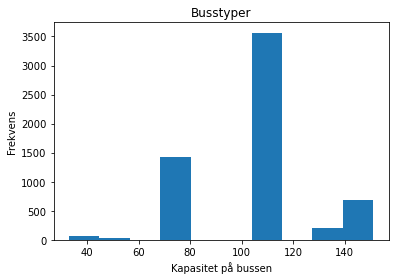

In [4]:
fig, ax = plt.subplots()
ax.hist(df['Kjøretøy_Kapasitet'])
ax.set_title('Busstyper')
ax.set_xlabel('Kapasitet på bussen')
ax.set_ylabel('Frekvens')

In [5]:
# Rydder opp og fjerner ytterkanter
threshold_max = ruter_data['Kjøretøy_Kapasitet'].quantile(0.99)
threshold_min = ruter_data['Kjøretøy_Kapasitet'].quantile(0.01)
ruterdata_clean = ruter_data[(ruter_data['Kjøretøy_Kapasitet'] <threshold_max) & (ruter_data['Kjøretøy_Kapasitet'] >threshold_min)]

Text(0, 0.5, 'Frekvens')

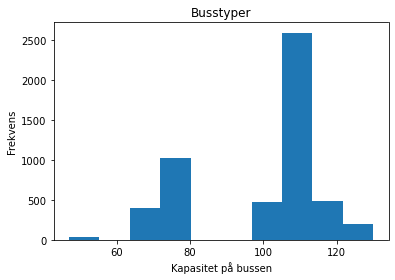

In [6]:
# Printer nytt histogram etter opprydding
fig, ax = plt.subplots()
ax.hist(ruterdata_clean['Kjøretøy_Kapasitet'])
ax.set_title('Busstyper')
ax.set_xlabel('Kapasitet på bussen')
ax.set_ylabel('Frekvens')

In [7]:
# Vi ser altså at den vanligste busstypen har kapasitet på omtrent 110 (112) plasser.

In [8]:
forsinkelse = ruter_data.rename(columns={'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra': 'fAnkomst', 'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra': 'fAvgang','Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra': 'pAnkomst', 'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra': 'pAvgang'})

In [9]:
forsinkelse = forsinkelse.filter(items=['fAnkomst','pAnkomst'])

In [10]:
forsinkelse[['fTimer','fMinutter','fSekunder']] = forsinkelse['fAnkomst'].str.split(':',expand=True)
forsinkelse[['pTimer','pMinutter','pSekunder']] = forsinkelse['pAnkomst'].str.split(':',expand=True)

In [11]:
forsinkelse["pTimer"] = pd.to_numeric(forsinkelse["pTimer"])
forsinkelse["pTimer"] = forsinkelse["pTimer"].mod(24)
forsinkelse["fTimer"] = pd.to_numeric(forsinkelse["fTimer"])
forsinkelse["fTimer"] = forsinkelse["fTimer"].mod(24)

In [12]:
kolonner = ['fTimer','fMinutter','fSekunder']
forsinkelse['fAnkomst'] = forsinkelse[kolonner].apply(lambda row: ':'.join(row.values.astype(str)),axis=1)
kolonner = ['pTimer','pMinutter','pSekunder']
forsinkelse['pAnkomst'] = forsinkelse[kolonner].apply(lambda row: ':'.join(row.values.astype(str)),axis=1)

In [13]:
forsinkelse = forsinkelse.filter(items=['fAnkomst','pAnkomst', 'pTimer'])
forsinkelse = forsinkelse.rename(columns={'pTimer': 'Timer'})

In [14]:
forsinkelse["fAnkomst"] = forsinkelse["fAnkomst"].astype("datetime64")
forsinkelse["pAnkomst"] = forsinkelse["pAnkomst"].astype("datetime64")    # litt usikker på hva jeg har gjort feil her? 

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 10:53:53

In [15]:
# Skriver ut busser i Asker
busserAsker=pd.read_csv("Ruter_data.csv",sep=";")
busserAsker=[busserAsker.Kommune=="Asker"]

In [16]:
# Skriver ut busser i Bærum
busserBærum=pd.read_csv("Ruter_data.csv",sep=";")
busserBærum=[busserBærum.Kommune=="Bærum"]


TypeError: list indices must be integers or slices, not str

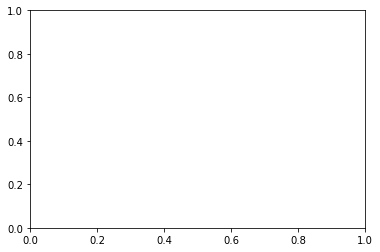

In [20]:
# Prøver å plotte kapasitet på bussene i Asker, men får feilkode. :/
fig, ax = plt.subplots()
ax.hist(busserAsker['Kjøretøy_Kapasitet'])
ax.set_title('Busstyper')
ax.set_xlabel('Kapasitet på bussen')
ax.set_ylabel('Frekvens')

In [ ]:
# Prøver å plotte kapasitet på bussene i Bærum, men får feilkode. :\

fig, ax = plt.subplots()
ax.hist(busserBærum['Kjøretøy_Kapasitet'])
ax.set_title('Busstyper')
ax.set_xlabel('Kapasitet på bussen')
ax.set_ylabel('Frekvens')

In [23]:
# Skriver ut antall busstopp i hver kommune.

ruter_data['Kommune'].value_counts()

Lillestrøm           1094
Bærum                 724
Lørenskog             525
Ullensaker            358
Asker                 326
Nittedal              274
Gamle Oslo            262
Rælingen              248
Nannestad             236
Alna                  210
Bjerke                199
Enebakk               153
Eidsvoll              144
Stovner               125
Vestre Aker           121
Nes                   117
Grünerløkka           110
Gjerdrum               97
Aurskog-Høland         97
Nordstrand             89
Ullern                 85
Sentrum                77
Grorud                 77
St.Hanshaugen          47
Sagene                 43
Frogner                33
Søndre Nordstrand      30
Nordre Follo           19
Indre Østfold          18
Nordre Aker            18
Lier                   15
Nordmarka              12
Hurdal                 11
Drammen                 6
Name: Kommune, dtype: int64

In [24]:
ruter_data['Kommune'] = ruter_data['Kommune'].replace(['Gamle Oslo', 'Bærum','Alna','Bjerke','Stovner','Vestre Aker','Grünerløkka','Nordstrand','Ullern','Grorud','Sentrum','St.Hanshaugen','Sagene','Frogner','Søndre Nordstrand','Nordre Aker'],'Oslo')
ruter_data['Kommune'] = ruter_data['Kommune'].replace(['Lillestrøm', 'Lørenskog','Rælingen','Aurskog-Høland'],'Øst for Oslo')
ruter_data['Kommune'] = ruter_data['Kommune'].replace(['Asker','Lier','Drammen'],'Vest for Oslo')
ruter_data['Kommune'] = ruter_data['Kommune'].replace(['Ullensaker','Nittedal','Nordmarka','Nannestad','Eidsvoll','Nes','Gjerdrum','Hurdal'],'Nord for Oslo')
ruter_data['Kommune'] = ruter_data['Kommune'].replace(['Enebakk','Nordre Follo','Indre Østfold'],'Sør for Oslo')


Text(0, 0.5, 'Frekvens')

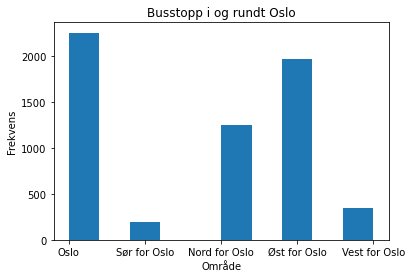

In [26]:
fig, ax = plt.subplots()
ax.hist(ruter_data['Kommune'])
ax.set_title('Busstopp i og rundt Oslo')
ax.set_xlabel('Område')
ax.set_ylabel('Frekvens')